In [1]:
# run data wrangling notebook first.
%run ./unit_5_Data_Wrangling_WC.ipynb

./unit_5_Data_Wrangling_WC.ipynb:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  },


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#alameda_df= master_df_master[master_df_master.RegionName == 'Alameda County'] 
#alameda_df.reset_index(inplace=True)

#print(alameda_df.head())
#sacramento_df= master_df_master[master_df_master.RegionName == 'Sacramento County']
#sacramento_df.reset_index(inplace=True)

#la_df= master_df_master[master_df_master.RegionName == 'Los Angeles County']
#la_df.reset_index(inplace=True)

## 1. Calculate Pearson Correlation Coefficient 

### 1.1. Alameda

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.96 at strongest negative correlation. Mortgage rate has weakest correlation at -0.11. 
Only number of monthly listing in Zillow is over -0.5.  

In [4]:
alameda_df = master_df_master[master_df_master.RegionName=='Alameda County'].copy()
alameda_df.drop(['Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)
alameda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 8 columns):
Date                   61 non-null datetime64[ns]
RegionName             61 non-null object
Afford_idx             61 non-null float64
SalePrice              61 non-null float64
UnemployRate           61 non-null float64
Rate                   61 non-null float64
Days_On_Zillow         61 non-null float64
Monthly_List_Zillow    61 non-null float64
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 4.3+ KB


In [5]:
alam_corr = alameda_df.corr()
alam_corr.head()

,Afford_idx,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
Afford_idx,1.000000,-0.465295,0.489153,-0.458531,0.607849,0.160462
SalePrice,-0.465295,1.000000,-0.959253,-0.109471,-0.317180,-0.556541
UnemployRate,0.489153,-0.959253,1.000000,0.174267,0.339144,0.463926
Rate,-0.458531,-0.109471,0.174267,1.000000,-0.154545,0.053217
Days_On_Zillow,0.607849,-0.317180,0.339144,-0.154545,1.000000,0.173643


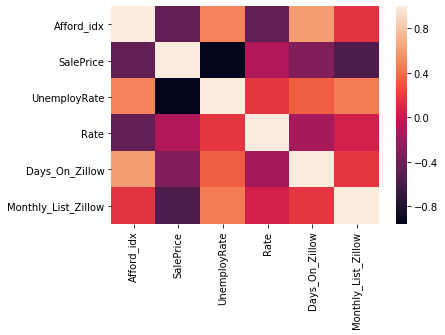

In [6]:
sns.heatmap(alam_corr)

### 1.2. Sacramento

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.95 at strongest negative correlation followed by Affordability indext at -0.89. 
Mortgage rate has weakest correlation at -0.09. 
Surprisingly, for this market, number of days on Zillow has correlation of -0.55 and number of monthly listing in Zillow is at 0.16. 
Just looking at Pearson coffecient, Sacramento market has different characteristics than Alameda. 

In [7]:
sac_df = master_df_master[master_df_master.RegionName=='Sacramento County'].copy()
sac_df.drop(['Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)

In [8]:
sac_corr = sac_df.corr()
sac_corr.head()

,Afford_idx,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
Afford_idx,1.000000,-0.885834,0.867977,-0.069754,0.573252,-0.298230
SalePrice,-0.885834,1.000000,-0.953217,-0.097158,-0.553002,0.158407
UnemployRate,0.867977,-0.953217,1.000000,0.204221,0.519833,-0.328659
Rate,-0.069754,-0.097158,0.204221,1.000000,0.010811,-0.278544
Days_On_Zillow,0.573252,-0.553002,0.519833,0.010811,1.000000,0.064255


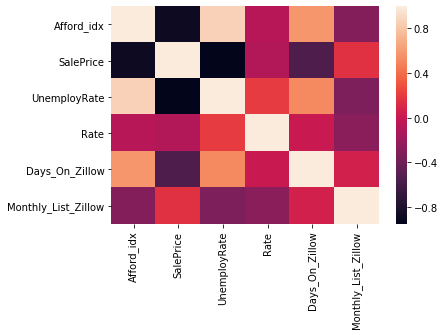

In [9]:
sns.heatmap(sac_corr)

### 1.3. L.A.

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.93 at strongest negative correlation followed by Affordability indext and Monthly listing at -0.67. 
Mortgage rate has weakest correlation at -0.11. 
L.A. is yet again different from Sacramento and Alameda in that affordability index and number of monthly listing is over -0.5.

In [10]:
la_df = master_df_master[master_df_master.RegionName=='Los Angeles County'].copy()
la_df.drop(['Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)

In [11]:
la_corr = la_df.corr()
la_corr.head()

,Afford_idx,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
Afford_idx,1.000000,-0.674496,0.560784,-0.246446,0.386239,0.300370
SalePrice,-0.674496,1.000000,-0.931257,-0.111129,-0.243789,-0.671344
UnemployRate,0.560784,-0.931257,1.000000,0.247941,0.138547,0.518685
Rate,-0.246446,-0.111129,0.247941,1.000000,-0.121567,-0.042807
Days_On_Zillow,0.386239,-0.243789,0.138547,-0.121567,1.000000,0.304981


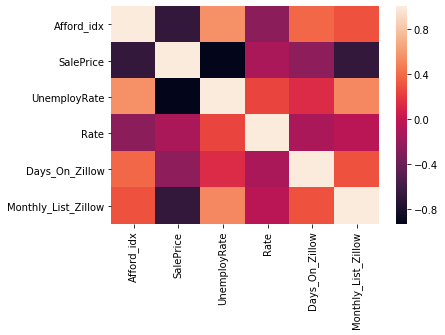

In [12]:
sns.heatmap(la_corr)

## 2. Linear regression
### 2.1. Alameda

1) Monthly_List_Zillow variable which was the only variable other than Unemployment Rate that went over -0.5 Pearson Coefficient. It has slope of 0.

2) Affordability index variable close behind with -0.46. 

slope = -0.0013004829085428203 # of Monthly Listing / SalePrice
intercept = 2944.614179565922 # of Monthly Listing


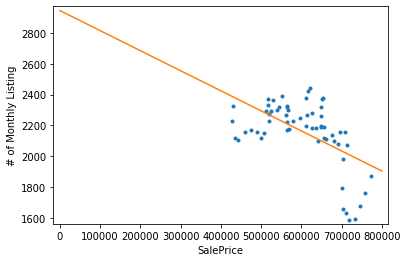

In [13]:
_ = plt.plot(alameda_df.SalePrice, alameda_df.Monthly_List_Zillow, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('# of Monthly Listing')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(alameda_df.SalePrice, alameda_df.Monthly_List_Zillow, 1)

# Print the results to the screen
print('slope =', a, '# of Monthly Listing / SalePrice')
print('intercept =', b, '# of Monthly Listing')

# Make theoretical line to plot
x = np.array([0,800000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


slope = -1.5729156838012414e-07 Affordability Index / SalePrice
intercept = 0.31614637986848976 Affordability Index


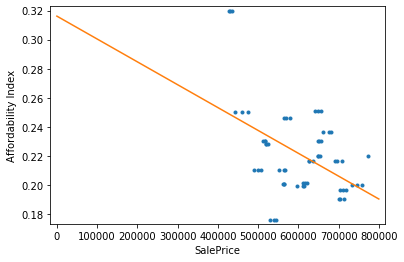

In [14]:
_ = plt.plot(alameda_df.SalePrice, alameda_df.Afford_idx, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Affordability Index')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(alameda_df.SalePrice, alameda_df.Afford_idx, 1)

# Print the results to the screen
print('slope =', a, 'Affordability Index / SalePrice')
print('intercept =', b, 'Affordability Index')

# Make theoretical line to plot
x = np.array([0,800000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

### 2.2. Sacramento

slope = -1.0725467165090528e-06 Affordability Index / SalePrice
intercept = 0.7680755798795135 Affordability Index


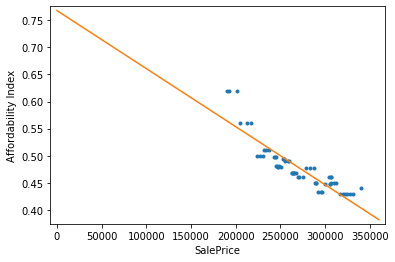

In [15]:
_ = plt.plot(sac_df.SalePrice, sac_df.Afford_idx, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Affordability Index')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(sac_df.SalePrice, sac_df.Afford_idx, 1)

# Print the results to the screen
print('slope =', a, 'Affordability Index / SalePrice')
print('intercept =', b, 'Affordability Index')

# Make theoretical line to plot
x = np.array([0,360000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

### 2.3. L.A.

1) Affordability index and Monthly listing both have pearson coefficient at -0.67.  

slope = -6.719612575602431e-07 Affordability Index / SalePrice
intercept = 0.5987596616729687 Affordability Index


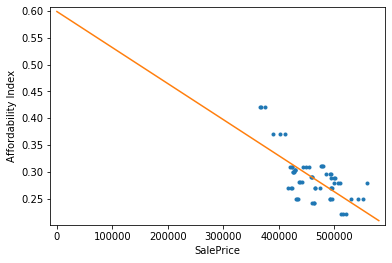

In [16]:
_ = plt.plot(la_df.SalePrice, la_df.Afford_idx, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Affordability Index')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(la_df.SalePrice, la_df.Afford_idx, 1)

# Print the results to the screen
print('slope =', a, 'Affordability Index / SalePrice')
print('intercept =', b, 'Affordability Index')

# Make theoretical line to plot
x = np.array([0,580000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

slope = -0.02627382234144917 # of Monthly listing / SalePrice
intercept = 30996.13220167387 # of Monthly listing


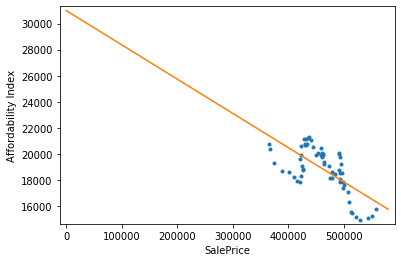

In [17]:
_ = plt.plot(la_df.SalePrice, la_df.Monthly_List_Zillow, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Affordability Index')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(la_df.SalePrice, la_df.Monthly_List_Zillow, 1)

# Print the results to the screen
print('slope =', a, '# of Monthly listing / SalePrice')
print('intercept =', b, '# of Monthly listing')

# Make theoretical line to plot
x = np.array([0,580000])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

### 3. Dynamic Time Warping — synchrony of signals varying in lengths. 
Explore difference in sale price trend between Alameda, Sacramento and L.A.
Also explore difference between sale price trend between Alameda and close counties - Santa Clara, Contra Costa, San Mateo and Marin.   


In [18]:
from dtw import dtw, accelerated_dtw

d1 = alameda_df.SalePrice.values
d2 = alameda_df.UnemployRatedf.values



ModuleNotFoundError: No module named 'dtw'

In [ ]:

d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

## 4. Are there significant differences between subgroups in your data that may be relevant to your project aim?

### 4.1. Alameda - Mortgage rate in early 2013 that could affect slow down in sale price growth? Can I use DTW or Time Lagged Cross Correlation?  
### 4.2. Unemployment in 2017 and affect on sale price. - What methods can I use? 

